## ML_LAB05
## DECISION TREES AND ENSEMBLE METHODS
### LAKSHITA SETHI
### 21BDA54

### 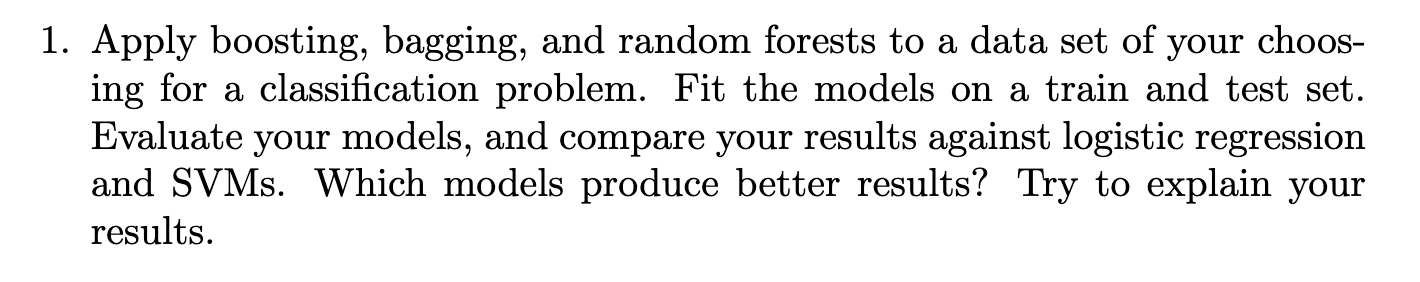

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [40]:
data = pd.read_csv("/Users/lakshitasethi/Downloads/adult.csv")

In [41]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


#### Hence, the data is clean. We need not preprocess it.

In [6]:
data.shape

(32561, 15)

In [7]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [8]:
data['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

<AxesSubplot:xlabel='income', ylabel='count'>

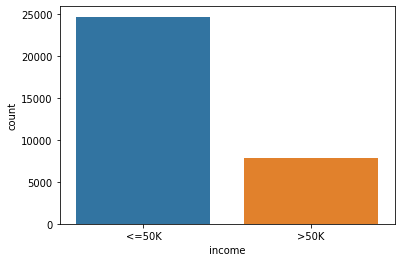

In [9]:
# Class Distribution
sns.countplot(data['income'])

#### We can see that the class is unbalanced.
#### We'll use LabelEncoder for encoding all the variables into numerical values.

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le = LabelEncoder()

In [44]:
for i in data.columns:
    data[i]=le.fit_transform(data[i])

In [13]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,72,0,2649,11,8,6,0,1,4,0,0,91,39,39,0
1,65,4,6514,11,8,6,4,1,4,0,0,91,17,39,0
2,49,0,11175,15,9,6,0,4,2,0,0,91,39,39,0
3,37,4,7009,5,3,0,7,4,4,0,0,90,39,39,0
4,24,4,16850,15,9,5,10,3,4,0,0,90,39,39,0


<AxesSubplot:>

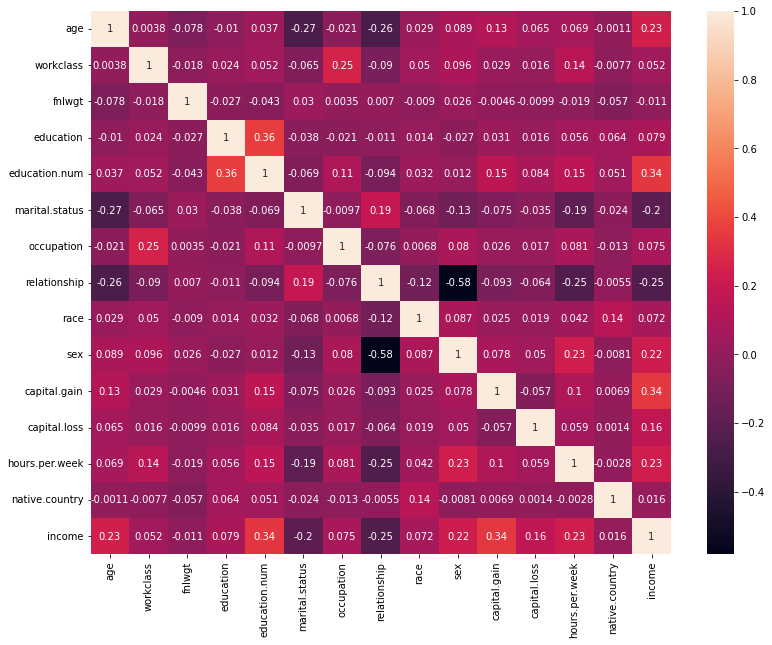

In [14]:
# Correlation matrix

fig=plt.figure(figsize=(13,10))
sns.heatmap(data.corr(),annot=True)

#### None of the variables show any high correlation with "income".

In [45]:
X = data[data.columns[:-1]]
Y = data['income']

In [16]:
X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,72,0,2649,11,8,6,0,1,4,0,0,91,39,39
1,65,4,6514,11,8,6,4,1,4,0,0,91,17,39
2,49,0,11175,15,9,6,0,4,2,0,0,91,39,39
3,37,4,7009,5,3,0,7,4,4,0,0,90,39,39
4,24,4,16850,15,9,5,10,3,4,0,0,90,39,39


In [17]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#### Importing necessary libraries for modelling

In [47]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score, precision_score, accuracy_score, plot_confusion_matrix, classification_report, f1_score

## 1. Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [21]:
rf = RandomForestClassifier(max_depth = 7,random_state = 48) # Keeping max_depth = 7 same as DT
rf.fit(X_train,Y_train)

yp_train = rf.predict(X_train)
yp_test = rf.predict(X_test)

In [22]:
print("Classification Report for Train Data")
print(classification_report(Y_train, yp_train))
print("Classification Report for Test Data")
print(classification_report(Y_test, yp_test))

Classification Report for Train Data
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     17291
           1       0.81      0.54      0.65      5501

    accuracy                           0.86     22792
   macro avg       0.84      0.75      0.78     22792
weighted avg       0.85      0.86      0.85     22792

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      7429
           1       0.80      0.52      0.63      2340

    accuracy                           0.85      9769
   macro avg       0.83      0.74      0.77      9769
weighted avg       0.85      0.85      0.84      9769



In [23]:
# Accuracy
print("The accuracy on Train data is: ",round(accuracy_score(Y_train,yp_train),2))
print("The accuracy on Test data is: ",round(accuracy_score(Y_test,yp_test),2))

The accuracy on Train data is:  0.86
The accuracy on Test data is:  0.85


In [24]:
# Precision
print("Precision on Train Data is: ",round(precision_score(Y_train,yp_train,average = "weighted"),2))
print("Precision on Test Data is: ",round(precision_score(Y_test,yp_test,average = "weighted"),2))

Precision on Train Data is:  0.85
Precision on Test Data is:  0.85


In [25]:
# Recall 
print("Recall on Train Data is: ",round(recall_score(Y_train,yp_train,average = "weighted"),2))
print("Recall on Test Data is: ",(round(recall_score(Y_test,yp_test,average = "weighted"),2)))

Recall on Train Data is:  0.86
Recall on Test Data is:  0.85


In [26]:
# F1 Score
print("F1 Score on Train Data is: {}".format(round(f1_score(Y_train,yp_train,average = "weighted"),2)))
print("F1 Score on Test Data is: {}".format(round(f1_score(Y_test,yp_test,average = "weighted"),2)))

F1 Score on Train Data is: 0.85
F1 Score on Test Data is: 0.84


## 2. Bagging
#### Bagging, is shorthand for the combination of bootstrapping and aggregating. Bootstrapping is a method to help decrease the variance of the classifier and reduce overfitting, by resampling data from the training set with the same cardinality as the original set.
##### 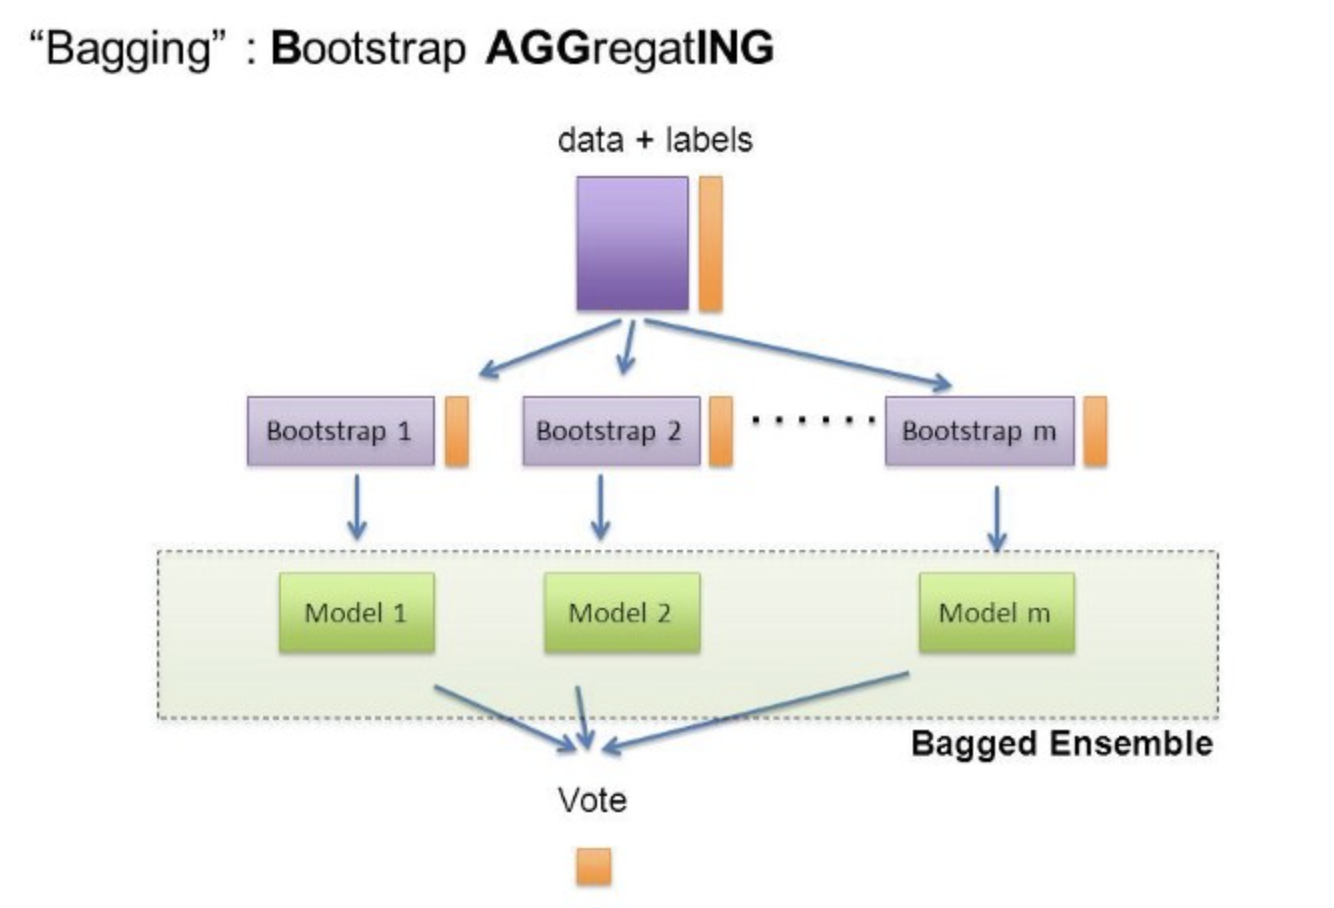

In [27]:
from sklearn.ensemble import BaggingClassifier

In [28]:
tree =  RandomForestClassifier()

In [29]:
bagging_clf = BaggingClassifier(base_estimator = tree, n_estimators=100, random_state=42)

In [30]:
bagging_clf.fit(X_train, Y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=42)

In [31]:
yp_train = bagging_clf.predict(X_train)
yp_test = bagging_clf.predict(X_test)

In [32]:
print("Classification Report for Train Data")
print(classification_report(Y_train, yp_train))
print("Classification Report for Test Data")
print(classification_report(Y_test, yp_test))

Classification Report for Train Data
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17291
           1       0.98      0.91      0.95      5501

    accuracy                           0.97     22792
   macro avg       0.98      0.95      0.96     22792
weighted avg       0.97      0.97      0.97     22792

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7429
           1       0.77      0.61      0.68      2340

    accuracy                           0.86      9769
   macro avg       0.83      0.78      0.80      9769
weighted avg       0.86      0.86      0.86      9769



In [33]:
# Accuracy
print("The accuracy on Train data is: ",round(accuracy_score(Y_train,yp_train),2))
print("The accuracy on Test data is: ",round(accuracy_score(Y_test,yp_test),2))

The accuracy on Train data is:  0.97
The accuracy on Test data is:  0.86


In [34]:
# Precision
print("Precision on Train Data is: ",round(precision_score(Y_train,yp_train,average = "weighted"),2))
print("Precision on Test Data is: ",round(precision_score(Y_test,yp_test,average = "weighted"),2))

Precision on Train Data is:  0.97
Precision on Test Data is:  0.86


In [35]:
# Recall 
print("Recall on Train Data is: ",round(recall_score(Y_train,yp_train,average = "weighted"),2))
print("Recall on Test Data is: ",(round(recall_score(Y_test,yp_test,average = "weighted"),2)))

Recall on Train Data is:  0.97
Recall on Test Data is:  0.86


In [36]:
# F1 Score
print("F1 Score on Train Data is: {}".format(round(f1_score(Y_train,yp_train,average = "weighted"),2)))
print("F1 Score on Test Data is: {}".format(round(f1_score(Y_test,yp_test,average = "weighted"),2)))

F1 Score on Train Data is: 0.97
F1 Score on Test Data is: 0.86


## 3. XGBoosting
#### XGBoost (eXtreme Gradient Boosting) is a direct application of Gradient Boosting for decision trees.

In [37]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [38]:
from xgboost import XGBClassifier

In [50]:
#split the data into train and test splits
seed = 7
test_size = 0.33
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = test_size , random_state = seed)

In [51]:
# Fit the XGBoost model on training data
model = XGBClassifier()
model.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [52]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


In [53]:
#Make predictions on test data
Y_pred = model.predict(X_test)

In [54]:
print(Y_pred)

[0 0 0 ... 1 0 0]


In [56]:
# Evaluate accuracy of our model
acc = accuracy_score(Y_test,Y_pred)
print("The accuracy of our XGBoost Classifier on Test data is %.2f%%" % (acc * 100))

The accuracy of our XGBoost Classifier on Test data is 86.79%


## 4. AdaBoost

In [57]:
from sklearn.ensemble import AdaBoostClassifier

In [78]:
ada_boost_clf = AdaBoostClassifier(n_estimators=30)
ada_boost_clf.fit(X_train, Y_train)

yp_train = ada_boost_clf.predict(X_train)
yp_test = ada_boost_clf.predict(X_test)

In [79]:
print("Classification Report for Train Data")
print(classification_report(Y_train, yp_train))
print("Classification Report for Test Data")
print(classification_report(Y_test, yp_test))

Classification Report for Train Data
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     16563
           1       0.77      0.59      0.67      5252

    accuracy                           0.86     21815
   macro avg       0.82      0.77      0.79     21815
weighted avg       0.85      0.86      0.85     21815

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      8157
           1       0.76      0.58      0.66      2589

    accuracy                           0.85     10746
   macro avg       0.82      0.76      0.78     10746
weighted avg       0.85      0.85      0.85     10746



In [80]:
# Accuracy
print("The accuracy on Train data is: ",round(accuracy_score(Y_train,yp_train),2))
print("The accuracy on Test data is: ",round(accuracy_score(Y_test,yp_test),2))

The accuracy on Train data is:  0.86
The accuracy on Test data is:  0.85


## 5. Gradient Boosting

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

In [75]:
grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_boost_clf.fit(X_train, Y_train)

yp_train = grad_boost_clf.predict(X_train)
yp_test = grad_boost_clf.predict(X_test)

In [76]:
print("Classification Report for Train Data")
print(classification_report(Y_train, yp_train))
print("Classification Report for Test Data")
print(classification_report(Y_test, yp_test))

Classification Report for Train Data
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     16563
           1       0.80      0.60      0.69      5252

    accuracy                           0.87     21815
   macro avg       0.84      0.78      0.80     21815
weighted avg       0.86      0.87      0.86     21815

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      8157
           1       0.79      0.59      0.68      2589

    accuracy                           0.86     10746
   macro avg       0.84      0.77      0.80     10746
weighted avg       0.86      0.86      0.86     10746



In [77]:
# Accuracy
print("The accuracy on Train data is: ",round(accuracy_score(Y_train,yp_train),2))
print("The accuracy on Test data is: ",round(accuracy_score(Y_test,yp_test),2))

The accuracy on Train data is:  0.87
The accuracy on Test data is:  0.86


## 6. Logistic Regression

In [68]:
lr = LogisticRegression(max_iter = 1000,random_state = 48)
lr.fit(X_train,Y_train)

yp_train = lr.predict(X_train)
yp_test = lr.predict(X_test)

In [69]:
print("Classification Report for Train Data")
print(classification_report(Y_train, yp_train))
print("Classification Report for Test Data")
print(classification_report(Y_test, yp_test))

Classification Report for Train Data
              precision    recall  f1-score   support

           0       0.83      0.94      0.88     16563
           1       0.68      0.37      0.48      5252

    accuracy                           0.81     21815
   macro avg       0.75      0.66      0.68     21815
weighted avg       0.79      0.81      0.78     21815

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      8157
           1       0.67      0.37      0.48      2589

    accuracy                           0.81     10746
   macro avg       0.75      0.66      0.68     10746
weighted avg       0.79      0.81      0.78     10746



In [70]:
# Accuracy
print("The accuracy on Train data is: ",round(accuracy_score(Y_train,yp_train),2))
print("The accuracy on Test data is: ",round(accuracy_score(Y_test,yp_test),2))

The accuracy on Train data is:  0.81
The accuracy on Test data is:  0.81


## 7. Support Vector Machine

In [71]:
from sklearn import svm

In [72]:
sv = svm.SVC()
sv.fit(X_train,Y_train)

yp_train = sv.predict(X_train)
yp_test = sv.predict(X_test)

In [73]:
print("Classification Report for Train Data")
print(classification_report(Y_train, yp_train))
print("Classification Report for Test Data")
print(classification_report(Y_test, yp_test))

Classification Report for Train Data
              precision    recall  f1-score   support

           0       0.76      1.00      0.86     16563
           1       0.00      0.00      0.00      5252

    accuracy                           0.76     21815
   macro avg       0.38      0.50      0.43     21815
weighted avg       0.58      0.76      0.66     21815

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      8157
           1       0.00      0.00      0.00      2589

    accuracy                           0.76     10746
   macro avg       0.38      0.50      0.43     10746
weighted avg       0.58      0.76      0.66     10746



In [74]:
# Accuracy
print("The accuracy on Train data is: ",round(accuracy_score(Y_train,yp_train),2))
print("The accuracy on Test data is: ",round(accuracy_score(Y_test,yp_test),2))

The accuracy on Train data is:  0.76
The accuracy on Test data is:  0.76


### According to our classification models, Bagging Classifier outperforms all other models with 97% accuracy. 

#### Ref. https://towardsdatascience.com/boosting-in-machine-learning-and-the-implementation-of-xgboost-in-python-fb5365e9f2a0